# Análise Exploratória da Base de Compras (POC Inovamed)
Este notebook tem como objetivo explorar a base de dados enviada e entender padrões, correlações e dados faltantes. Isso servirá de base para a modelagem preditiva no Skyone Studio.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline


In [3]:
# Caminho absoluto do arquivo
file_path = r'C:\Skyone 2025\POCs Skyone\Inovamed\Base de Dados Compras IA.xlsx'

# Leitura da planilha
df = pd.read_excel(file_path, sheet_name='Planilha de Compras')

# Primeiras linhas
df.head()


,DATA,Estabelecimento,Código no Fornecedor,Descrição Detalhada,Fornecedor,Saldo Contratos,Estimativa de Retirada,Pendências,Estoque Mínimo,Estoque Disponível,Pedidos Pendentes,Sugestão de Compra,Giro 3 meses Winner,Giro 3 meses,Giro Médio 2 meses,Qtde Mercado Privado,Valor de Compra,Preço Cotação
0,2025-04-01,INOVAMED,1322.0,1 - Maleato de Enalapril 10 Mg VO Cp /Isen,Cimed,84109277,16255127,528300,0,30368500,0,-13321000,16060884,527500,263750,236219,0.0250,0.027
1,2025-04-01,INOVAMED - FILIAL MG,1322.0,1 - Maleato de Enalapril 10 Mg VO Cp /Isen,Cimed,27077918,5413589,1476500,0,1598000,7050000,-1362000,11003840,791000,395500,1492252,0.0255,0.027
2,2025-04-01,INOVAMED,173.0,1 - Maleato de Enalapril 10 Mg VO Cp /Isen,Cimed,0,0,0,0,0,0,0,0,0,0,236219,0.0320,0.026
3,2025-04-01,INOVAMED - FILIAL MG,173.0,1 - Maleato de Enalapril 10 Mg VO Cp /Isen,Cimed,0,0,0,0,0,0,0,0,0,0,1492252,0.0000,0.026
4,2025-04-01,INOVAMED,2357.0,1 - Maleato de Enalapril 10 Mg VO Cp /Isen,Cimed,0,0,0,0,0,0,1380,0,2760,1380,236219,0.0530,0.040


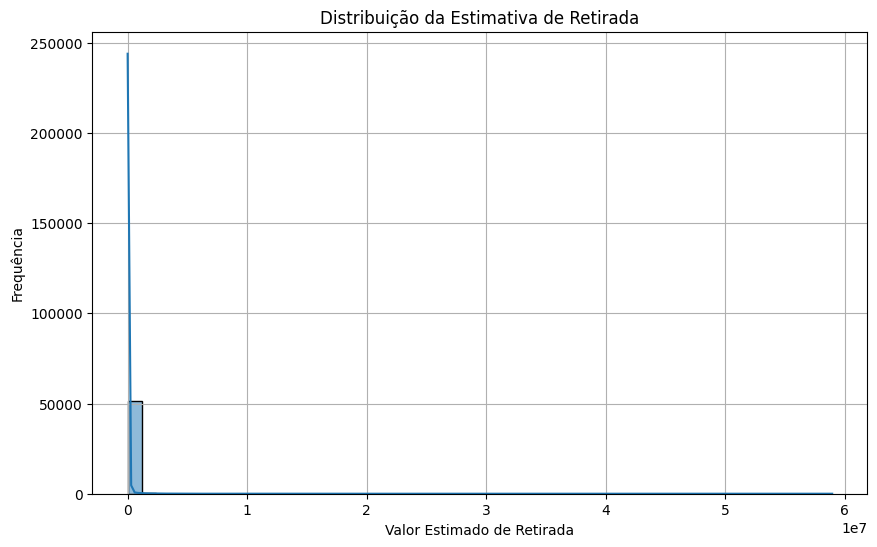

In [4]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Estimativa de Retirada'], kde=True, bins=50)
plt.title('Distribuição da Estimativa de Retirada')
plt.xlabel('Valor Estimado de Retirada')
plt.ylabel('Frequência')
plt.grid(True)
plt.show()


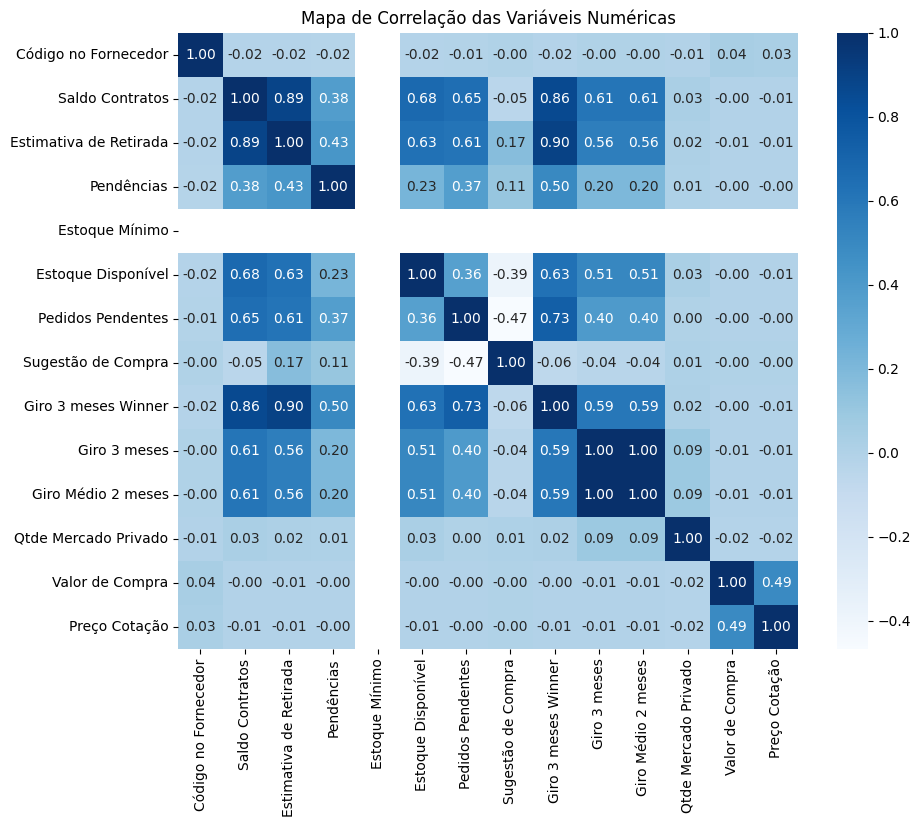

In [5]:
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
plt.title('Mapa de Correlação das Variáveis Numéricas')
plt.show()


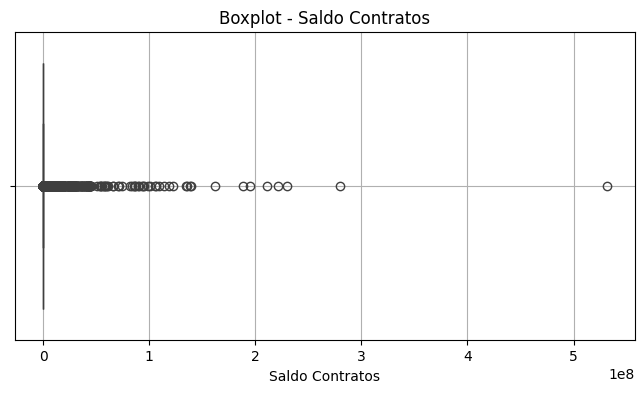

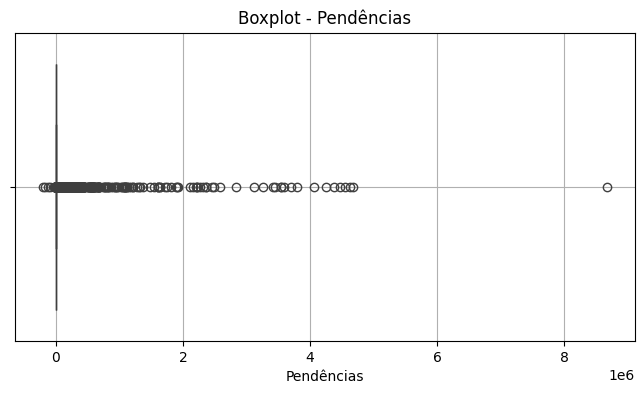

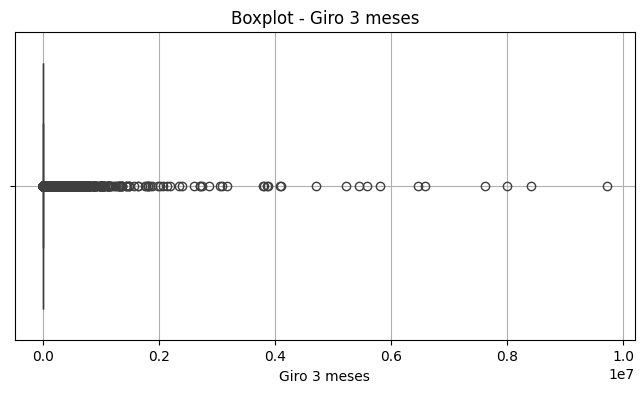

In [6]:
variaveis = ['Saldo Contratos', 'Pendências', 'Giro 3 meses']

for var in variaveis:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[var])
    plt.title(f'Boxplot - {var}')
    plt.grid(True)
    plt.show()


In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Seleção de features e target
X = df[['Saldo Contratos', 'Pendências', 'Giro 3 meses']]
y = df['Estimativa de Retirada']

# Separação treino/teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo baseline: Regressão Linear
modelo = LinearRegression()
modelo.fit(X_train, y_train)

# Previsões
y_pred = modelo.predict(X_test)

# Avaliação
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred) ** 0.5

print(f'MAE: {mae:.2f}')
print(f'RMSE: {rmse:.2f}')


MAE: 27091.05
RMSE: 360591.14
